# 1. Classification
Treating the problem as a classification problem, use a decision tree to learn a classification model
that predicts wine quality based on the available features. Ensuring that overfitting has not occurred,
use the learned model to identify the two most prominent features.

# (a) White wine quality 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd
import graphviz

Reading data from csv and printin some rows

In [2]:
data = pd.read_csv("/home/mscuser/Desktop/winequality-white.csv", sep=';')
data.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6


It is obvious that there are 11 attributes and quality. Data are going to be splitted to y,x. y: quality amd x: all the other attributes

In [3]:
y = data.quality
x = data.drop('quality', axis=1)

Criterion: the function to measure the quality of a split(Entropy is used for the information gain)                             
Splitter: Choose the split at each node                                                      
Max_depth: The max_depth is user in order do avoid overfitting                                       
Classifier must be fitted to the model. It must learn from the model. This is done by passing out set to the fit model

In [4]:
clf=tree.DecisionTreeClassifier(criterion='entropy', splitter="best", max_depth=5)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In the next step the decision tree is exported. The result is returned as a string, this is why out_file is None. The visualization of the tree occured via graphviz

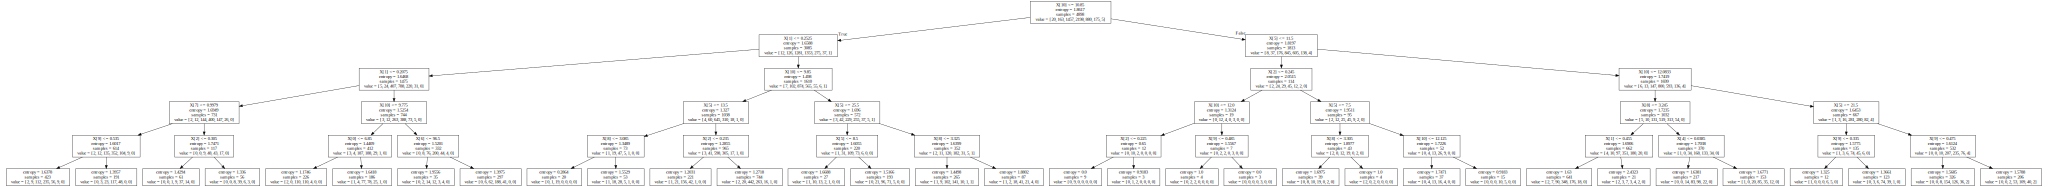

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None)
graphviz.Source(dot_data)

In [6]:
rel_imp_lst = clf.feature_importances_
feature_lst = data.columns[:-1]
y_pos = np.arange(len(feature_lst))

The importance of each of the features of white wine is illustrated in the next bar chart. As a consequence, the most prominent features are alcohol and volatile activity.

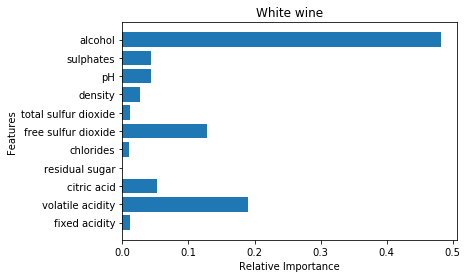

In [7]:
plt.barh(y_pos,rel_imp_lst,align='center')
plt.yticks(range(len(feature_lst)),feature_lst)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('White wine')
plt.show()

# (b) Red wine quality 

Reading data from csv and printin some rows

In [8]:
data = pd.read_csv("/home/mscuser/Desktop/winequality-red.csv", sep=';')
data.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [9]:
y = data.quality
x = data.drop('quality', axis=1)

In [10]:
clf=tree.DecisionTreeClassifier(criterion='entropy', splitter="best", max_depth=5)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

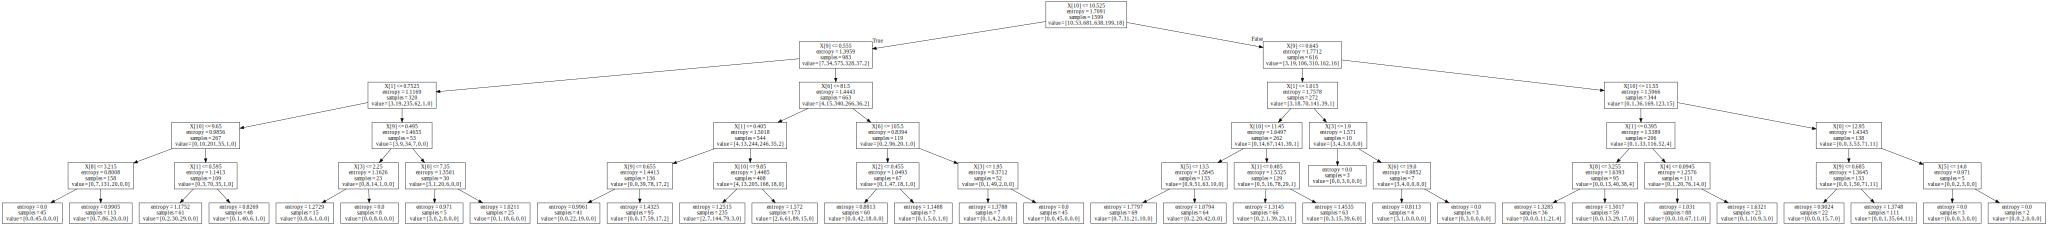

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None)
graphviz.Source(dot_data)

In [12]:
rel_imp_lst = clf.feature_importances_
feature_lst = data.columns[:-1]
y_pos = np.arange(len(feature_lst))

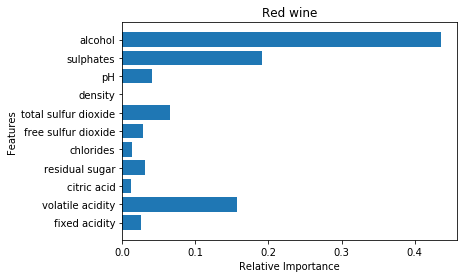

In [13]:
plt.barh(y_pos,rel_imp_lst,align='center')
plt.yticks(range(len(feature_lst)),feature_lst)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Red wine')
plt.show()

The most prominent features are alcohol and sulphates.